In [2]:
# Instalamos las librerias que usaremos en el desarrollo del Sistema de Alerta y posteriormente las importamos
!pip install pandas seaborn matplotlib numpy openpyxl

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import openpyxl as oxl
print("¡Librerías cargadas exitosamente!")

¡Librerías cargadas exitosamente!


In [4]:
df_motivacion = pd.read_csv('Cuestionario motivacion academica.csv')
df_ingresos = pd.read_csv('Data_UINN_Facultad.csv',sep=';',skiprows=3)
print('Archivos cargados exitosamente.')

Archivos cargados exitosamente.


In [5]:
# Realizamos un análisis rapido de las variables que contiene el DataFrame de motivación
print("\n--- Vistazo a 'motivacion' ---")
display(df_motivacion.head(2))


--- Vistazo a 'motivacion' ---


,Carrera que estudias actualmente,Ciudad de origen (desde dónde te viniste a la universidad),Año en que te matriculaste,Género,"Indica la cantidad de asignaturas reprobadas desde su inicio de la carrera hasta la fecha. Si no has reprobado, marca 0",Indica tu nivel actual de motivación por estudiar tu carrera,"Indica, en general, qué tan 4 asistes a clases","Indica, en general, qué tan activamente participas en clases (Ejemplo: Preguntar, comentar, dar ideas, colaborar con compañeros, entre otros).",[Me considero lo suficientemente capacitado/a para enfrentarme con éxito a tareas académicas desafiantes],[Pienso que tengo bastante capacidad para comprender bien y con rapidez contenidos académicos desafiantes],...,"Cuando realicé este curso [Si lo que estaba estudiando parecía sin importancia, me pude convencer a mí mismo/a de mantenerme estudiando]","Cuando realicé este curso [Si lo necesitaba, tuve formas de convencerme de mantenerme trabajando en una tarea difícil]","Cuando realicé este curso [Si estudiar se hacía muy aburrido, pude encontrar un modo de hacerlo entretenido]","Cuando realicé este curso [Incluso si una tarea parecía sin sentido, pude empujarme a mí mismo/a de mantenerme haciéndola hasta terminarla]","Cuando realicé este curso [Si una tarea era difícil, pude encontrar una forma de mantenerme realizándola hasta concluirla]",Cuando realicé este curso [Me empujé a mí mismo/a para mantenerme trabajando incluso si la tarea era realmente aburrida],Cuando realicé este curso [Soy de esas personas que no necesita estudiar para aprobar una asignatura o pasar un semestre desafiante],Cuando realicé este curso [Creo que estoy preparado(a) y bastante capacitado(a) para conseguir muchos éxitos académicos frente a tareas académicas desafiantes],Estoy pensando seriamente en abandonar mi carrera o cambiarme a otra pronto,Ya decidí abandonar mi carrera o cambiarme a otra pronto
0,3309,San pedro de la Paz,2025,Masculino,0,4,4,2,4,3,...,3,4,4,4,4,4,3,4,2,No
1,3310,Temuco,2021,Masculino,8,1,3,4,2,1,...,5,5,5,5,5,5,5,5,3,No


In [6]:
# Hacemos lo mismo con el DataFrame de ingresos. Realizamos un análisis rapido de las variables que 
# contiene el DataFrame de ingresos
print("\n--- Vistazo a 'ingresos' ---")
display(df_ingresos.head(2))


--- Vistazo a 'ingresos' ---


,Cred. Aprob.,Código Carrera Nacional,Año Proceso,Sexo,Grupo Dependencia,Domicilio Región,Preferencia,Selección,Tipo Selección,Puntaje Ponderado,Puntaje Matemáticas,Puntaje Ranking,Puntaje NEM,Puntaje Lenguaje,Puntaje Ciencias
0,0.0,13064.0,2013.0,MASCULINO,MUNICIPAL,REGION DEL BIOBIO,3.0,RATIFICADO,1ER. LLAMADO,"583,55",573.0,599.0,599.0,605.0,568.0
1,0.0,13062.0,2013.0,MASCULINO,MUNICIPAL,REGION DEL BIOBIO,1.0,RATIFICADO,1ER. LLAMADO,"664,25",634.0,764.0,764.0,685.0,568.0


In [7]:
# Verificamos que solo estén las carreras que queremos estudiar en el dataframe de motivación,
# cuyos códigos son [3309,3310,3311,3318,3319,3303]
df_motivacion["Carrera que estudias actualmente"].unique()


array([3309, 3310, 3303, 3311, 3318, 3319], dtype=int64)

In [8]:
# Verificamos que en el dataframe de ingresos estén las 6 ingenierias que queremos estudiar, cuyos 
# códigos son [13071., 13070., 13073., 13069., 13072.,13019.]
df_ingresos["Código Carrera Nacional"].unique()

array([13064., 13062., 13071., 13068., 13070., 13063., 13073., 13075.,
       13069., 13066., 13102., 13072., 13074., 13076.,    nan])

In [9]:
# Vemos los tipos de datos y nulos de 'motivacion'
print("--- Info 'motivacion' (ANTES de limpiar) ---")
df_motivacion.info()

--- Info 'motivacion' (ANTES de limpiar) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                           --------------  ----- 
 0   Carrera que estudias actualmente                                                                                                                                 1460 non-null   int64 
 1   Ciudad de origen (desde dónde te viniste a la universidad)                                                                                                       1460 non-null   object
 2   Año en que te matriculaste                                                             

In [10]:
# Vemos los tipos de datos y nulos de 'ingresos'
print("--- Info 'ingresos' (ANTES de limpiar) ---")
df_ingresos.info()

--- Info 'ingresos' (ANTES de limpiar) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4274 entries, 0 to 4273
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cred. Aprob.             4273 non-null   float64
 1   Código Carrera Nacional  4273 non-null   float64
 2   Año Proceso              4273 non-null   float64
 3   Sexo                     4273 non-null   object 
 4   Grupo Dependencia        4273 non-null   object 
 5   Domicilio Región         4273 non-null   object 
 6   Preferencia              4273 non-null   float64
 7   Selección                4273 non-null   object 
 8   Tipo Selección           4273 non-null   object 
 9   Puntaje Ponderado        4273 non-null   object 
 10  Puntaje Matemáticas      4273 non-null   float64
 11  Puntaje Ranking          4273 non-null   float64
 12  Puntaje NEM              4273 non-null   float64
 13  Puntaje Lenguaje         4273 non-n

In [11]:
# Eliminamos las columnas que no nos sirven del DataFrame de ingresos, dejando solo nuestras variables 
# de interés, tales como "Código Carrera Nacional", "Domicilio Región", "Preferencia" y "Puntaje Ponderado".

columnas_utiles = [
    "Código Carrera Nacional",
    "Domicilio Región",
    "Preferencia",
    "Puntaje Ponderado",
]
df_ingresos = df_ingresos[columnas_utiles]
display(df_ingresos)

,Código Carrera Nacional,Domicilio Región,Preferencia,Puntaje Ponderado
0,13064.0,REGION DEL BIOBIO,3.0,"583,55"
1,13062.0,REGION DEL BIOBIO,1.0,"664,25"
2,13064.0,REGION DEL BIOBIO,3.0,"571,45"
3,13064.0,REGION DEL BIOBIO,3.0,"585,55"
4,13062.0,REGION DEL BIOBIO,1.0,"615,3"
...,...,...,...,...
4269,13063.0,REGION DEL BIOBIO,1.0,590
4270,13074.0,REGION DEL BIOBIO,1.0,"689,75"
4271,13066.0,REGION DEL BIOBIO,3.0,"649,55"
4272,13075.0,REGION DE LOS RIOS,1.0,"681,85"


In [12]:
# Eliminamos las columnas que no nos sirven del DataFrame de motivacion, dejando solo nuestras variables
# de interés: "Carrera que estudias actualmente", "Ciudad de origen (desde dónde te viniste a la universidad)",
# "Indica la cantidad de asignaturas reprobadas desde su inicio de la carrera hasta la fecha. Si no has reprobado, marca 0",
# "Indica tu nivel actual de motivación por estudiar tu carrera", "Estoy pensando seriamente en abandonar 
# mi carrera o cambiarme a otra pronto".

columnas_utiles = [
    "Carrera que estudias actualmente",
    "Ciudad de origen (desde dónde te viniste a la universidad)",
    "Indica la cantidad de asignaturas reprobadas desde su inicio de la carrera hasta la fecha. Si no has reprobado, marca 0",
    "Indica tu nivel actual de motivación por estudiar tu carrera",
    "Estoy pensando seriamente en abandonar mi carrera o cambiarme a otra pronto"
]
df_motivacion = df_motivacion[columnas_utiles]
display(df_motivacion)

,Carrera que estudias actualmente,Ciudad de origen (desde dónde te viniste a la universidad),"Indica la cantidad de asignaturas reprobadas desde su inicio de la carrera hasta la fecha. Si no has reprobado, marca 0",Indica tu nivel actual de motivación por estudiar tu carrera,Estoy pensando seriamente en abandonar mi carrera o cambiarme a otra pronto
0,3309,San pedro de la Paz,0,4,2
1,3310,Temuco,8,1,3
2,3303,Collipulli,2,4,1
3,3311,Cauquenes,4,4,1
4,3310,Magallanes,0,4,1
...,...,...,...,...,...
1455,3309,Chillán,0,4,1
1456,3310,Chillán,0,4,2
1457,3319,Curicó,4,2,4
1458,3310,Concepción,0,4,1


In [13]:
# Limpiamos las filas de motivacion dejando solo las carreras de Ingeniería Civil Industrial, Eléctrica,
# Electrónica, Civil e Informática, pues Comercial no se encuentra en el DataFrame de ingresos. Note que 
# este DataFrame no tiene filas nulas (visto más arriba).

codigos_validos = [3309, 3310, 3311, 3318, 3319]
df_motivacion = df_motivacion[df_motivacion["Carrera que estudias actualmente"].isin(codigos_validos)]
display(df_motivacion)

,Carrera que estudias actualmente,Ciudad de origen (desde dónde te viniste a la universidad),"Indica la cantidad de asignaturas reprobadas desde su inicio de la carrera hasta la fecha. Si no has reprobado, marca 0",Indica tu nivel actual de motivación por estudiar tu carrera,Estoy pensando seriamente en abandonar mi carrera o cambiarme a otra pronto
0,3309,San pedro de la Paz,0,4,2
1,3310,Temuco,8,1,3
3,3311,Cauquenes,4,4,1
4,3310,Magallanes,0,4,1
5,3310,Cañete,3,5,1
...,...,...,...,...,...
1455,3309,Chillán,0,4,1
1456,3310,Chillán,0,4,2
1457,3319,Curicó,4,2,4
1458,3310,Concepción,0,4,1


In [14]:
# Limpiamos las filas del DataFrame de ingresos, dejando solo las carreras de Ingeniería Civil Industrial, 
# Eléctrica, Electrónica, Civil, Informática y Comercial. Al igual que el DataFrame de motivación, acá
# tampoco existen filas con valores nulos.

codigos_validos = [13072, 13069, 13070, 13071, 13073]
df_ingresos = df_ingresos[df_ingresos["Código Carrera Nacional"].isin(codigos_validos)]
display(df_ingresos)


,Código Carrera Nacional,Domicilio Región,Preferencia,Puntaje Ponderado
7,13071.0,REGION DEL BIOBIO,4.0,"647,35"
11,13070.0,REGION DEL BIOBIO,5.0,"645,3"
14,13073.0,REGION METROPOLITANA DE SANTIAGO,3.0,"630,65"
26,13069.0,REGION DEL BIOBIO,1.0,"671,5"
28,13071.0,REGION DEL BIOBIO,1.0,"621,1"
...,...,...,...,...
4257,13069.0,REGION DEL BIOBIO,1.0,"683,15"
4260,13072.0,REGION DEL BIOBIO,1.0,"678,6"
4262,13070.0,REGION DEL BIOBIO,2.0,"637,8"
4263,13070.0,REGION DEL BIOBIO,2.0,"632,65"


In [15]:
# Verificamos que solo estén las carreras que queremos analizar en el DataFrame de motivacion 
# después de la limpieza de filas.

df_motivacion["Carrera que estudias actualmente"].unique()

array([3309, 3310, 3311, 3318, 3319], dtype=int64)

In [16]:
# Verificamos que solo estén las carreras que queremos analizar en el DataFrame de ingresos
# después de la limpieza de filas.

df_ingresos["Código Carrera Nacional"].unique()

array([13071., 13070., 13073., 13069., 13072.])

In [17]:
# Revisamos las regiones que aparecen en el DataFrame de ingresos con el fin de saber si están las 
# 15 regiones que existían hasta el año 2017 (la base de datos contempla información solo hasta ese año).

df_ingresos["Domicilio Región"].unique()

array(['REGION DEL BIOBIO', 'REGION METROPOLITANA DE SANTIAGO',
       'REGION DEL MAULE',
       "REGION DEL LIBERTADOR GENERAL BERNARDO O'HIGGINS",
       'REGION DE LOS LAGOS', 'REGION DE LA ARAUCANIA',
       'REGION DE ANTOFAGASTA', 'REGION DE LOS RIOS',
       'REGION DE TARAPACA', 'REGION DE VALPARAISO',
       'REGION AISEN DEL GENERAL CARLOS IBAÑEZ DEL CAMPO',
       'REGION DEL LIBERTADOR GENERAL BERNARDO OHIGGINS',
       'REGION DE MAGALLANES Y DE LA ANTARTICA CHILENA',
       'REGION DE COQUIMBO', 'REGION DE ATACAMA',
       'REGION DE ARICA Y PARINACOTA'], dtype=object)

In [18]:
# Unificamos los nombres de las regiones en el DataFrame de ingresos, dejando solo las 15 correspondientes
# hasta el año 2017, por lo que no se considerará a Ñuble como Región para ajustarnos temporalmente. Para
# la unificación de nombres se considerarán solo carácteres básicos, eliminando tildes, espacios extra,
# mayúsculas fuera de lugar, etc. Esto se realiza con el fin de evitar problemas de lecturas de los 
# programas y softwares al exportar los archivos.

map_region = {
    "REGION DEL BIOBIO": "Region del Biobio",
    "REGION METROPOLITANA DE SANTIAGO": "Region Metropolitana de Santiago",
    "REGION DEL MAULE": "Region del Maule",
    "REGION DEL LIBERTADOR GENERAL BERNARDO O'HIGGINGS": 
        "Region del Libertador General Bernardo O'Higgins",
    "REGION DEL LIBERTADOR GENERAL BERNARDO O'HIGGINS":
        "Region del Libertador General Bernardo O'Higgins",
    "REGION DEL LIBERTADOR GENERAL BERNARDO OHIGGINS":
        "Region del Libertador General Bernardo O'Higgins",
    "REGION DE LOS LAGOS": "Region de Los Lagos",
    "REGION DE LA ARAUCANIA": "Region de La Araucania",
    "REGION DE ANTOFAGASTA": "Region de Antofagasta",
    "REGION DE LOS RIOS": "Region de Los Rios",
    "REGION DE TARAPACA": "Region de Tarapaca",
    "REGION DE VALPARAISO": "Region de Valparaiso",
    "REGION AISEN DEL GENERAL CARLOS IBAÑEZ DEL CAMPO":
        "Region de Aysen del General Carlos Ibanez del Campo",
    "REGION DE MAGALLANES Y DE LA ANTARTICA CHILENA":
        "Region de Magallanes y de la Antartica Chilena",
    "REGION DE COQUIMBO": "Region de Coquimbo",
    "REGION DE ATACAMA": "Region de Atacama",
    "REGION DE ARICA Y PARINACOTA": "Region de Arica y Parinacota"
}
df_ingresos["Región_Normalizada"] = (df_ingresos["Domicilio Región"].str.strip().map(map_region))
df_ingresos["Domicilio Región"] = df_ingresos["Región_Normalizada"]
df_ingresos = df_ingresos.drop(columns=["Región_Normalizada"])
display(df_ingresos)

,Código Carrera Nacional,Domicilio Región,Preferencia,Puntaje Ponderado
7,13071.0,Region del Biobio,4.0,"647,35"
11,13070.0,Region del Biobio,5.0,"645,3"
14,13073.0,Region Metropolitana de Santiago,3.0,"630,65"
26,13069.0,Region del Biobio,1.0,"671,5"
28,13071.0,Region del Biobio,1.0,"621,1"
...,...,...,...,...
4257,13069.0,Region del Biobio,1.0,"683,15"
4260,13072.0,Region del Biobio,1.0,"678,6"
4262,13070.0,Region del Biobio,2.0,"637,8"
4263,13070.0,Region del Biobio,2.0,"632,65"


In [19]:
# Verificamos que estén las 15 regiones antes mencionadas en el DataFrame de ingresos posterior a la 
# unificación del formato.

df_ingresos["Domicilio Región"].unique()

array(['Region del Biobio', 'Region Metropolitana de Santiago',
       'Region del Maule',
       "Region del Libertador General Bernardo O'Higgins",
       'Region de Los Lagos', 'Region de La Araucania',
       'Region de Antofagasta', 'Region de Los Rios',
       'Region de Tarapaca', 'Region de Valparaiso',
       'Region de Aysen del General Carlos Ibanez del Campo',
       'Region de Magallanes y de la Antartica Chilena',
       'Region de Coquimbo', 'Region de Atacama',
       'Region de Arica y Parinacota'], dtype=object)

In [20]:
# Revisamos las ciudades que aparecen en el DataFrame de motivacion con el fin de saber que localidades
# considerar al momento de agrupar los datos.

df_motivacion["Ciudad de origen (desde dónde te viniste a la universidad)"].unique()

array(['San pedro de la Paz', 'Temuco', 'Cauquenes', 'Magallanes',
       'Cañete', 'Santiago', 'Chillán', 'Antofagasta ', 'Traiguén',
       'Puerto Varas', 'Concepción ', 'Ñiquen', 'Castro', 'Quellón',
       'Bulnes', 'San Carlos', 'Coronel', 'Laja', 'Penco',
       'San Fernando ', 'Renaico ', 'Talca ', 'Los Ángeles ', 'Cañete ',
       'Lonquimay', 'Quirihue', 'Linares', 'Yumbel', 'Puerto Montt',
       'Lota', 'Talcahuano', 'Chillán ', 'Curacautín', 'Coelemu ',
       'Florida ', 'Tomé ', 'Chonchi', 'Calama', 'Coelemu',
       'Arica y Parinacota ', 'Penco ', 'Dalcahue', 'Chiguayante ',
       'Hualpén', 'Florida', 'Curicó ', 'Antuco', 'Hualqui',
       'Santa Juana ', 'Puerto Montt ', 'Santa Bárbara ', 'San Javier',
       'San Fabián', 'Mulchén ', 'Chiguayante', 'Quillón', 'Talcahuano ',
       'Cabrero', 'Curanilahue', 'Coyanco', 'Ancud', 'Contulmo ',
       'La Serena', 'Puerto Aysen', 'Puerto montt', 'Hualqui ',
       'Antofagasta', 'Santa Juana', 'Lebu', 'Coronel ', 'Osorn

In [21]:
# Unificamos los nombres de las ciudades del Dataframe de motivacion, eliminando los espacios,
# las ciudades duplicadas, tildes y carácteres especiales como la "ñ". Esto se realiza con el fin
# de evitar problemas de lecturas de los programas y softwares al exportar los archivos.

map_ciudad = {
    # Desde tu lista original (tras strip())

    "San pedro de la Paz": "San Pedro de la Paz",
    "Temuco": "Temuco",
    "Cauquenes": "Cauquenes",
    "Magallanes": "Magallanes",
    "Cañete": "Canete",
    "Santiago": "Santiago",
    "Chillán": "Chillan",
    "Antofagasta": "Antofagasta",
    "Traiguén": "Traiguen",
    "Puerto Varas": "Puerto Varas",
    "Concepción": "Concepcion",
    "Ñiquen": "Niquen",
    "Castro": "Castro",
    "Quellón": "Quellon",
    "Bulnes": "Bulnes",
    "San Carlos": "San Carlos",
    "Coronel": "Coronel",
    "Laja": "Laja",
    "Penco": "Penco",
    "San Fernando": "San Fernando",
    "Renaico": "Renaico",
    "Talca": "Talca",
    "Los Ángeles": "Los Angeles",
    "Lonquimay": "Lonquimay",
    "Quirihue": "Quirihue",
    "Linares": "Linares",
    "Yumbel": "Yumbel",
    "Puerto Montt": "Puerto Montt",
    "Lota": "Lota",
    "Talcahuano": "Talcahuano",
    "Curacautín": "Curacautin",
    "Coelemu": "Coelemu",
    "Florida": "Florida",
    "Tomé": "Tome",
    "Chonchi": "Chonchi",
    "Calama": "Calama",
    "Arica y Parinacota": "Arica y Parinacota",
    "Dalcahue": "Dalcahue",
    "Chiguayante": "Chiguayante",
    "Hualpén": "Hualpen",
    "Curicó": "Curico",
    "Antuco": "Antuco",
    "Hualqui": "Hualqui",
    "Santa Juana": "Santa Juana",
    "Santa Bárbara": "Santa Barbara",
    "San Javier": "San Javier",
    "San Fabián": "San Fabian",
    "Mulchén": "Mulchen",
    "Quillón": "Quillon",
    "Cabrero": "Cabrero",
    "Curanilahue": "Curanilahue",
    "Coyanco": "Coyanco",  # lo dejo tal cual, por si en tus datos está así
    "Ancud": "Ancud",
    "Contulmo": "Contulmo",
    "La Serena": "La Serena",
    "Puerto Aysen": "Puerto Aysen",
    "Puerto montt": "Puerto Montt",
    "Osorno": "Osorno",
    "San Pedro de la Costa": "San Pedro de la Paz",
    "Coyhaique": "Coyhaique",
    "Angol": "Angol",
    "Nacimiento": "Nacimiento",
    "Parral": "Parral",
    "Buchupureo": "Buchupureo",
    "Chiloé": "Chiloe",
    "Alto Hospicio": "Alto Hospicio",
    "Alto hospicio": "Alto Hospicio",
    "Gorbea": "Gorbea",
    "Chillán Viejo": "Chillan Viejo",
    "San Ignacio": "San Ignacio",
    "Constitución": "Constitucion",
    "Talcamavida": "Talcamavida",
    "Calbuco": "Calbuco",
    "San Nicolás": "San Nicolas",
    "Arauco": "Arauco",
    "Santa Cruz": "Santa Cruz",
    "Ecuador": "Ecuador",
    "Santa juana": "Santa Juana",   # misma ciudad, distinto formato
}

def normalizar_ciudad(valor):
    if pd.isna(valor):
        return valor
    clave = str(valor).strip()                 # quita espacios al inicio y final
    return map_ciudad.get(clave, clave)        # si no está en el diccionario, deja la original limpia

df_motivacion["Ciudad_normalizada"] = df_motivacion["Ciudad de origen (desde dónde te viniste a la universidad)"].apply(normalizar_ciudad)
df_motivacion["Ciudad de origen (desde dónde te viniste a la universidad)"] = df_motivacion["Ciudad_normalizada"]
df_motivacion = df_motivacion.drop(columns=["Ciudad_normalizada"])
display(df_motivacion)

,Carrera que estudias actualmente,Ciudad de origen (desde dónde te viniste a la universidad),"Indica la cantidad de asignaturas reprobadas desde su inicio de la carrera hasta la fecha. Si no has reprobado, marca 0",Indica tu nivel actual de motivación por estudiar tu carrera,Estoy pensando seriamente en abandonar mi carrera o cambiarme a otra pronto
0,3309,San Pedro de la Paz,0,4,2
1,3310,Temuco,8,1,3
3,3311,Cauquenes,4,4,1
4,3310,Magallanes,0,4,1
5,3310,Canete,3,5,1
...,...,...,...,...,...
1455,3309,Chillan,0,4,1
1456,3310,Chillan,0,4,2
1457,3319,Curico,4,2,4
1458,3310,Concepcion,0,4,1


In [22]:
# Verificamos que estén las ciudades originales en el DataFrame de motivación, pero asegurándonos que 
# estén con el formato unificado.

df_motivacion["Ciudad de origen (desde dónde te viniste a la universidad)"].unique()

array(['San Pedro de la Paz', 'Temuco', 'Cauquenes', 'Magallanes',
       'Canete', 'Santiago', 'Chillan', 'Antofagasta', 'Traiguen',
       'Puerto Varas', 'Concepcion', 'Niquen', 'Castro', 'Quellon',
       'Bulnes', 'San Carlos', 'Coronel', 'Laja', 'Penco', 'San Fernando',
       'Renaico', 'Talca', 'Los Angeles', 'Lonquimay', 'Quirihue',
       'Linares', 'Yumbel', 'Puerto Montt', 'Lota', 'Talcahuano',
       'Curacautin', 'Coelemu', 'Florida', 'Tome', 'Chonchi', 'Calama',
       'Arica y Parinacota', 'Dalcahue', 'Chiguayante', 'Hualpen',
       'Curico', 'Antuco', 'Hualqui', 'Santa Juana', 'Santa Barbara',
       'San Javier', 'San Fabian', 'Mulchen', 'Quillon', 'Cabrero',
       'Curanilahue', 'Coyanco', 'Ancud', 'Contulmo', 'La Serena',
       'Puerto Aysen', 'Lebu', 'Osorno', 'Coyhaique', 'Angol',
       'Nacimiento', 'Parral', 'Buchupureo', 'Chiloe', 'Alto Hospicio',
       'Gorbea', 'Chillan Viejo', 'San Ignacio', 'Constitucion',
       'Talcamavida', 'Calbuco', 'San Nicolas'

In [23]:
# Creamos una nueva columna en al DataFrame de motivacion, donde se identifique a que Región pertenece el 
# alumno de acuerdo a su ciudad de origen, manteniendo el formato unificado del DataFrame de ingresos para
# posterior hacer el merge con estas variables.

ciudad_a_region = {
    # Region Metropolitana
    "Santiago": "Region Metropolitana de Santiago",

    # Region del Biobio (incluye comunas de la antigua provincia de Ñuble)
    "San Pedro de la Paz": "Region del Biobio",
    "Concepcion": "Region del Biobio",
    "Coronel": "Region del Biobio",
    "Lota": "Region del Biobio",
    "Talcahuano": "Region del Biobio",
    "Penco": "Region del Biobio",
    "Laja": "Region del Biobio",
    "Yumbel": "Region del Biobio",
    "Florida": "Region del Biobio",
    "Tome": "Region del Biobio",
    "Chiguayante": "Region del Biobio",
    "Hualpen": "Region del Biobio",
    "Hualqui": "Region del Biobio",
    "Santa Juana": "Region del Biobio",
    "Santa Barbara": "Region del Biobio",
    "Mulchen": "Region del Biobio",
    "Quillon": "Region del Biobio",
    "Cabrero": "Region del Biobio",
    "Curanilahue": "Region del Biobio",
    "Lebu": "Region del Biobio",
    "Nacimiento": "Region del Biobio",
    "Antuco": "Region del Biobio",
    "Arauco": "Region del Biobio",
    "Coyanco": "Region del Biobio",    # asumido como comuna de Ñuble → Biobio
    "Buchupureo": "Region del Biobio",
    "Talcamavida": "Region del Biobio",
    "Chillan": "Region del Biobio",
    "Chillan Viejo": "Region del Biobio",
    "San Carlos": "Region del Biobio",
    "Niquen": "Region del Biobio",
    "Bulnes": "Region del Biobio",
    "Quirihue": "Region del Biobio",
    "Coelemu": "Region del Biobio",
    "San Fabian": "Region del Biobio",
    "San Nicolas": "Region del Biobio",
    "San Ignacio": "Region del Biobio",
    "Canete": "Region del Biobio",

    # Region del Maule
    "Cauquenes": "Region del Maule",
    "Talca": "Region del Maule",
    "Linares": "Region del Maule",
    "San Javier": "Region del Maule",
    "Parral": "Region del Maule",
    "Constitucion": "Region del Maule",
    "Curico": "Region del Maule",

    # Region del Libertador General Bernardo O'Higgins
    "San Fernando": "Region del Libertador General Bernardo O'Higgins",
    "Santa Cruz": "Region del Libertador General Bernardo O'Higgins",

    # Region de La Araucania
    "Temuco": "Region de La Araucania",
    "Traiguen": "Region de La Araucania",
    "Lonquimay": "Region de La Araucania",
    "Curacautin": "Region de La Araucania",
    "Angol": "Region de La Araucania",
    "Gorbea": "Region de La Araucania",
    "Renaico": "Region de La Araucania",  # hoy Malleco

    # Region de Los Lagos
    "Puerto Montt": "Region de Los Lagos",
    "Puerto Varas": "Region de Los Lagos",
    "Castro": "Region de Los Lagos",
    "Quellon": "Region de Los Lagos",
    "Chonchi": "Region de Los Lagos",
    "Ancud": "Region de Los Lagos",
    "Dalcahue": "Region de Los Lagos",
    "Calbuco": "Region de Los Lagos",
    "Chiloe": "Region de Los Lagos",
    "Osorno": "Region de Los Lagos",


    # Region de Antofagasta
    "Antofagasta": "Region de Antofagasta",
    "Calama": "Region de Antofagasta",

    # Region de Arica y Parinacota
    "Arica y Parinacota": "Region de Arica y Parinacota",

    # Region de Coquimbo
    "La Serena": "Region de Coquimbo",

    # Region de Aysén del General Carlos Ibáñez del Campo
    "Coyhaique": "Region de Aysen del General Carlos Ibanez del Campo",
    "Puerto Aysen": "Region de Aysen del General Carlos Ibanez del Campo",

    # Region de Magallanes y de la Antártica Chilena
    "Magallanes": "Region de Magallanes y de la Antartica Chilena",

    # Region de Tarapacá
    "Alto Hospicio": "Region de Tarapaca",

    # Region de Los Ríos (no hay ciudades en tu lista)

    # Region de Valparaíso, Atacama (tampoco hay ciudades en tu lista)

    # Caso extranjero
    "Ecuador": "Extranjero"
}

df_motivacion["Ciudad de origen (desde dónde te viniste a la universidad)"] = df_motivacion["Ciudad de origen (desde dónde te viniste a la universidad)"].str.strip()

# nueva columna con la región de cada persona
df_motivacion["Region"] = df_motivacion["Ciudad de origen (desde dónde te viniste a la universidad)"].map(ciudad_a_region)
display(df_motivacion)

,Carrera que estudias actualmente,Ciudad de origen (desde dónde te viniste a la universidad),"Indica la cantidad de asignaturas reprobadas desde su inicio de la carrera hasta la fecha. Si no has reprobado, marca 0",Indica tu nivel actual de motivación por estudiar tu carrera,Estoy pensando seriamente en abandonar mi carrera o cambiarme a otra pronto,Region
0,3309,San Pedro de la Paz,0,4,2,Region del Biobio
1,3310,Temuco,8,1,3,Region de La Araucania
3,3311,Cauquenes,4,4,1,Region del Maule
4,3310,Magallanes,0,4,1,Region de Magallanes y de la Antartica Chilena
5,3310,Canete,3,5,1,Region del Biobio
...,...,...,...,...,...,...
1455,3309,Chillan,0,4,1,Region del Biobio
1456,3310,Chillan,0,4,2,Region del Biobio
1457,3319,Curico,4,2,4,Region del Maule
1458,3310,Concepcion,0,4,1,Region del Biobio


In [24]:
# Renombramos los códigos de identificación de cada carrera en el DataFrame de ingresos por su equivalente
# del DataFrame de motivación. Es importante realizar esto para poder llevar a cabo el merge más adelante.

# Diccionario de equivalencias códigos Ingenierías Civiles (Nacionales -> UdeC)
cod_udec = {
    "13072": 3309,  # Industrial
    "13069": 3310,  # Civil
    "13070": 3311,  # Eléctrica
    "13071": 3318,  # Electrónica
    "13073": 3319   # Informática
}

# Convertir el código nacional a str eliminando los decimales
df_ingresos["CodigoNac_str"] = (
    df_ingresos["Código Carrera Nacional"]
    .astype(float)   
    .astype(int)
    .astype(str)     
)

# Crear columna ID_UdeC usando el diccionario (importante para el merge)
df_ingresos["ID_UdeC"] = df_ingresos["CodigoNac_str"].map(cod_udec)

# Eliminar la columna auxiliar
df_ingresos = df_ingresos.drop(columns=["CodigoNac_str"])

# Como ya no nos interesa conservar el código nacional original, lo eliminamos
# para quedarnos solo con el ID_UdeC:
df_ingresos = df_ingresos.drop(columns=["Código Carrera Nacional"])

# Reordenamos las columnas para dejar ID_UdeC al inicio
cols = ["ID_UdeC"] + [c for c in df_ingresos.columns if c != "ID_UdeC"]
df_ingresos = df_ingresos[cols]

display(df_ingresos)

,ID_UdeC,Domicilio Región,Preferencia,Puntaje Ponderado
7,3318,Region del Biobio,4.0,"647,35"
11,3311,Region del Biobio,5.0,"645,3"
14,3319,Region Metropolitana de Santiago,3.0,"630,65"
26,3310,Region del Biobio,1.0,"671,5"
28,3318,Region del Biobio,1.0,"621,1"
...,...,...,...,...
4257,3310,Region del Biobio,1.0,"683,15"
4260,3309,Region del Biobio,1.0,"678,6"
4262,3311,Region del Biobio,2.0,"637,8"
4263,3311,Region del Biobio,2.0,"632,65"


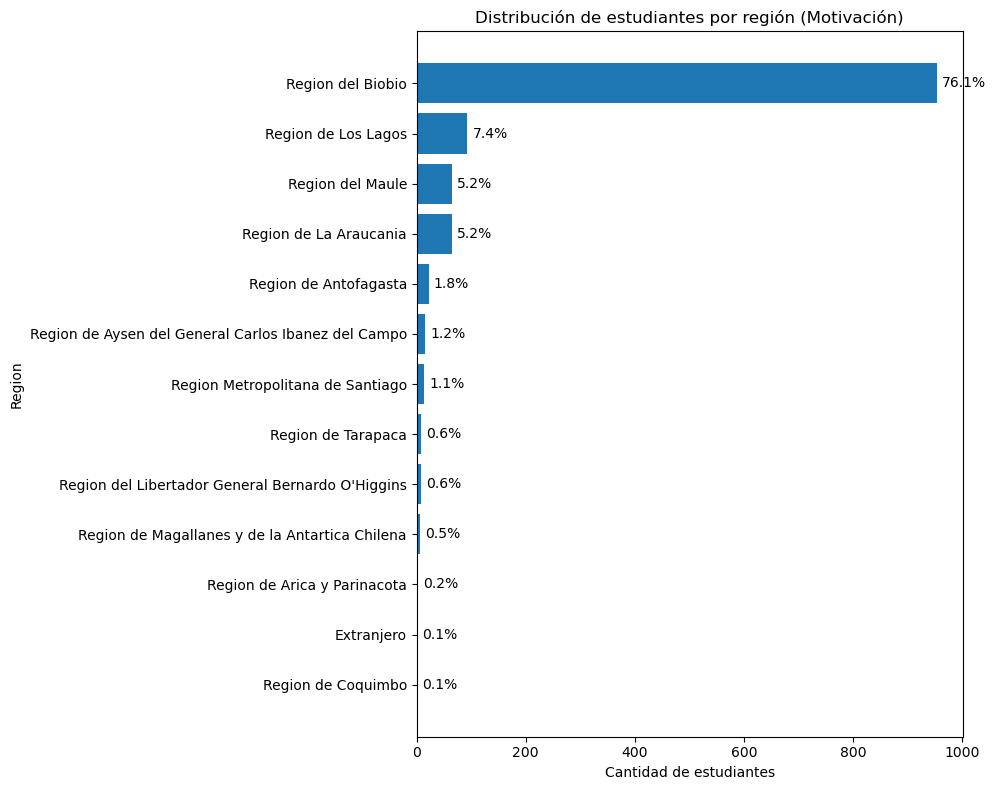

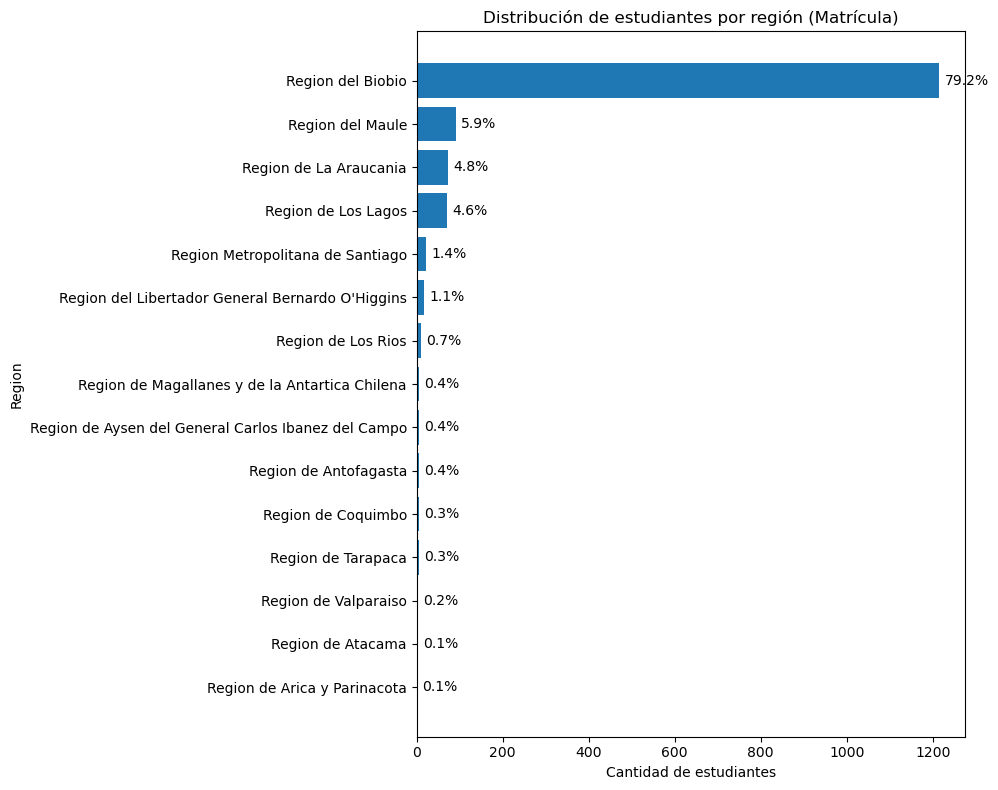

In [25]:
# Vamos a ver la densidad de la población (alumnos) por cada Región en los DataFrames de Motivacion y 
# Matricula, esto para poder agrupar por diferentes macro zonas sin que queden muy desbalanceadas las
# distribuciones.

# Contar regiones
conteo = df_motivacion["Region"].value_counts()
porcentajes = conteo / conteo.sum() * 100

# Ordenar de menor a mayor
conteo = conteo.sort_values()
porcentajes = porcentajes.loc[conteo.index]

# Gráfico
plt.figure(figsize=(10, 8))
bars = plt.barh(conteo.index, conteo)

# Agregar porcentaje al lado de cada barra
for i, (cantidad, pct) in enumerate(zip(conteo, porcentajes)):
    plt.text(cantidad + (conteo.max() * 0.01),    # posición X
             i,                                   # posición Y
             f"{pct:.1f}%",                       # texto
             va='center')

plt.xlabel("Cantidad de estudiantes")
plt.ylabel("Region")
plt.title("Distribución de estudiantes por región (Motivación)")
plt.tight_layout()
plt.show()

# Contar regiones
conteoa = df_ingresos["Domicilio Región"].value_counts()
porcentajesa = conteoa / conteoa.sum() * 100

# Ordenar
conteoa = conteoa.sort_values()
porcentajesa = porcentajesa.loc[conteoa.index]

# Gráfico
plt.figure(figsize=(10, 8))
bars = plt.barh(conteoa.index, conteoa)

# Agregar porcentaje
for i, (cantidad, pct) in enumerate(zip(conteoa, porcentajesa)):
    plt.text(cantidad + (conteoa.max() * 0.01),
             i,
             f"{pct:.1f}%",
             va='center')

plt.xlabel("Cantidad de estudiantes")
plt.ylabel("Region")
plt.title("Distribución de estudiantes por región (Matrícula)")
plt.tight_layout()
plt.show()

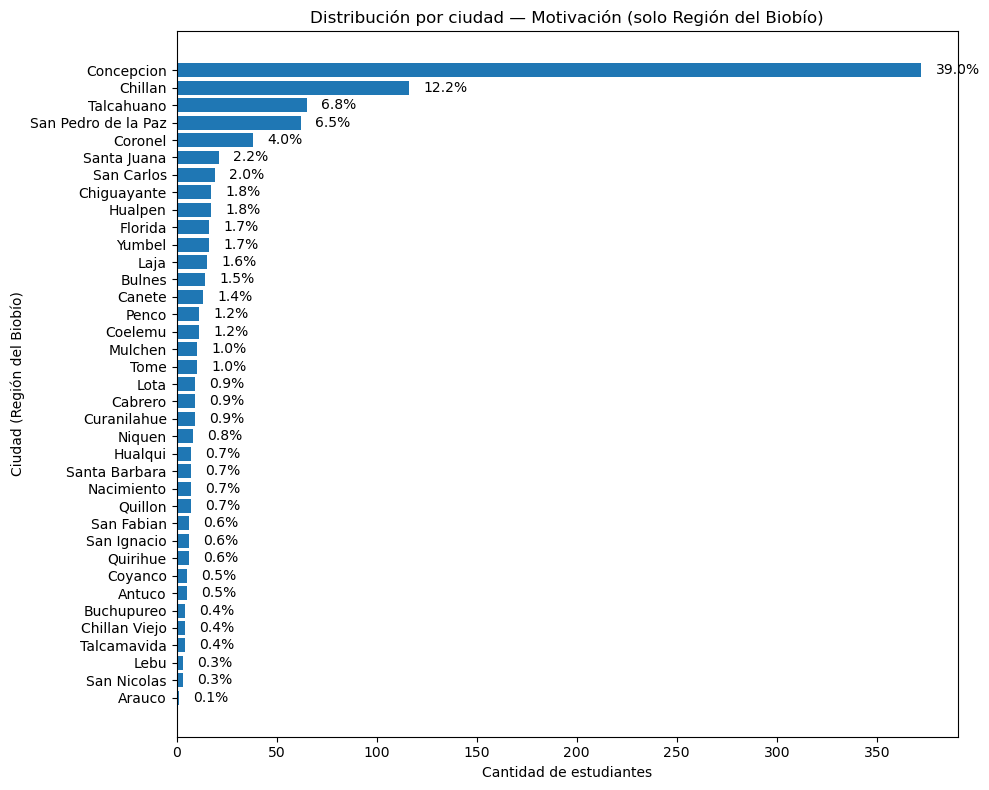

In [26]:
# Hacemos el mismo análisis de densidades pero ahora solo de las ciudades de la Región del Biobío, 
# para ver si se considerarán todas las ciudades de la Región o comunas y/o provincias específicas. 

# Filtrar solo regiones Biobío
bio = df_motivacion[df_motivacion["Region"] == "Region del Biobio"]

# Contar ciudades dentro del Biobío
conteo = bio["Ciudad de origen (desde dónde te viniste a la universidad)"].value_counts()

# Calcular porcentajes
porcentajes = conteo / conteo.sum() * 100

# Ordenar
conteo = conteo.sort_values()
porcentajes = porcentajes.loc[conteo.index]

# Graficar
plt.figure(figsize=(10, 8))
plt.barh(conteo.index, conteo)

# Agregar texto con porcentaje
for i, (cantidad, pct) in enumerate(zip(conteo, porcentajes)):
    plt.text(cantidad + (conteo.max() * 0.02),   # desplazamiento a la derecha
             i,
             f"{pct:.1f}%",
             va="center")

plt.xlabel("Cantidad de estudiantes")
plt.ylabel("Ciudad (Región del Biobío)")
plt.title("Distribución por ciudad — Motivación (solo Región del Biobío)")
plt.tight_layout()
plt.show()

In [27]:
# Una vez hecho el análisis anterior, creamos nuevos DataFrames con las macro zonas definidas gracias
# a los gráficos. En particular, serán dos nuevos DataFrames: uno para ingresos y otro para motivación,
# donde cada fila tendrá una macro zona y cada columna será el promedio de cada columna de interés en los 
# dataframes originales.

# Para el DataFrame de ingresos:

macro_zonas = {
    "Zona Norte" : ["Region de Arica y Parinacota", "Region de Tarapaca", "Region de Antofagasta",
                    "Region de Atacama", "Region de Coquimbo", "Region de Valparaiso",
                    "Region Metropolitana de Santiago", "Region del Libertador General Bernardo O'Higgins",
                    "Region del Maule" ],

    "Zona Centro": ["Region del Biobio"],

    "Zona Sur": ["Region de La Araucania", "Region de Aysen del General Carlos Ibanez del Campo" "Region de Los Rios",
                 "Region de Los Lagos", "Region de Magallanes y de la Antartica Chilena"]
} 

df_ingresos_macro = pd.DataFrame(columns=[  
    "ID_Geografico",
    "Puntaje ponderado promedio",
    "Preferencia promedio"
])
df_ingresos_macro["ID_Geografico"] = list(macro_zonas.keys())  # Dataframe de ingresos por macro zona
display(df_ingresos_macro)

,ID_Geografico,Puntaje ponderado promedio,Preferencia promedio
0,Zona Norte,NaN,NaN
1,Zona Centro,NaN,NaN
2,Zona Sur,NaN,NaN


In [28]:
# #Ahora, se rellenará el nuevo DataFrame (de las respectivas macro zonas) con los promedios correspondientes,
# obteniendo los datos del DataFrame Ingresos original.

# Primero, convertiremos la columna "Puntaje Ponderado" a formato numérico y luego remplazaremos las comas
# por puntos para que Python pueda reconocerlos como decimales:

df_ingresos["Puntaje Ponderado"] = df_ingresos["Puntaje Ponderado"].astype(str).str.replace(",", ".").astype(float)
df_ingresos["Preferencia"] = df_ingresos["Preferencia"].astype(str).str.replace(",", ".").astype(float)

# Rellenar el dataframe de ingresos por macro zona con los promedios (Puntaje promedio, preferencia promedio):
for i, macro_zona in enumerate(macro_zonas.keys()):
    regiones = macro_zonas[macro_zona]
    
    # Filtrar los datos del dataframe de ingresos que pertenecen a esta macro zona
    datos_macro = df_ingresos[df_ingresos["Domicilio Región"].isin(regiones)]
    
    # Calcular los promedios
    puntaje_promedio = datos_macro["Puntaje Ponderado"].mean()
    preferencia_promedio = datos_macro["Preferencia"].mean()
    
    # Insertar los datos en el dataframe de macro zonas
    df_ingresos_macro.loc[i, "Puntaje ponderado promedio"] = puntaje_promedio
    df_ingresos_macro.loc[i, "Preferencia promedio"] = preferencia_promedio
display(df_ingresos_macro)

,ID_Geografico,Puntaje ponderado promedio,Preferencia promedio
0,Zona Norte,678.342105,1.421053
1,Zona Centro,685.766543,1.341564
2,Zona Sur,691.76457,1.331126


In [ ]:
# En el DataFrame de ingresos asignaremos a cada carrera de cada zona respectiva su puntaje y preferencia 
# promedio correspondientes, junto al nombre de la carrera.

df_ingresos_con_carrera = df_ingresos.copy()

# Diccionario código UdeC -> nombre carrera
carrera_nombres = {
    3309: "Ingeniería Civil Industrial",
    3310: "Ingeniería Civil",
    3311: "Ingeniería Eléctrica",
    3318: "Ingeniería Electrónica",
    3319: "Ingeniería Informática"
}

# Aseguramos que ID_UdeC sea int
df_ingresos_con_carrera["ID_UdeC"] = df_ingresos_con_carrera["ID_UdeC"].astype(int)

# Columna con nombre de carrera
df_ingresos_con_carrera["Carrera"] = df_ingresos_con_carrera["ID_UdeC"].map(carrera_nombres)

df_ingresos_macro_con_carrera = []

for macro_zona in macro_zonas.keys():
    regiones = macro_zonas[macro_zona]
    
    # Filtrar datos por macro zona
    datos_zona = df_ingresos_con_carrera[
        df_ingresos_con_carrera["Domicilio Región"].isin(regiones)
    ]
    
    # Para cada carrera (usamos códigos UdeC, no nacionales)
    for carrera_codigo, carrera_nombre in carrera_nombres.items():
        
        # Filtrar datos por carrera
        datos_carrera = datos_zona[datos_zona["ID_UdeC"] == carrera_codigo]
        
        if len(datos_carrera) > 0:
            puntaje_promedio = datos_carrera["Puntaje Ponderado"].mean()
            preferencia_promedio = datos_carrera["Preferencia"].mean()
            
            df_ingresos_macro_con_carrera.append({
                "ID_Geografico": macro_zona,
                "Carrera": carrera_nombre,
                "ID_UdeC": carrera_codigo,
                "Puntaje ponderado promedio": puntaje_promedio,
                "Preferencia promedio": preferencia_promedio
            })

df_ingresos_macro_carrera = pd.DataFrame(df_ingresos_macro_con_carrera)
display(df_ingresos_macro_carrera)


,ID_Geografico,Carrera,ID_UdeC,Puntaje ponderado promedio,Preferencia promedio
0,Zona Norte,Ingeniería Civil Industrial,3309,697.845652,1.391304
1,Zona Norte,Ingeniería Civil,3310,705.655000,1.350000
2,Zona Norte,Ingeniería Eléctrica,3311,673.659091,1.590909
3,Zona Norte,Ingeniería Electrónica,3318,673.752083,1.250000
4,Zona Norte,Ingeniería Informática,3319,647.586250,1.500000
5,Zona Centro,Ingeniería Civil Industrial,3309,702.053217,1.222520
6,Zona Centro,Ingeniería Civil,3310,707.771617,1.225564
7,Zona Centro,Ingeniería Eléctrica,3311,675.427684,1.564972
8,Zona Centro,Ingeniería Electrónica,3318,660.967448,1.536458
9,Zona Centro,Ingeniería Informática,3319,659.984541,1.333333


In [30]:
# Ahora, modificamos el DataFrame de motivación para agregar los respectivos datos promedio (motivacion promedio,
# intención de abandono promedio y asignaturas reprobadas promedio) y separamos por zonas entre macro zonas
# y comunas particulares, donde estas comunas serán las pertenecientes a la provincia de Concepción y el
# resto serán agrupadas en las diferentes macro zonas como Zona Norte, Zona Sur y Otras Biobío:

macro_zonas_2 = {
    "Zona Norte" : ["Region de Arica y Parinacota", "Region de Tarapaca", "Region de Antofagasta",
                    "Region de Atacama", "Region de Coquimbo", "Region de Valparaiso",
                    "Region Metropolitana de Santiago", "Region del Libertador General Bernardo O'Higgins",
                    "Region del Maule"],

    "Zona Sur": ["Region de La Araucania", "Region de Aysen del General Carlos Ibanez del Campo", "Region de Los Rios",
                 "Region de Los Lagos", "Region de Magallanes y de la Antartica Chilena"],

    "Otras Biobio" : ["Lebu", "Arauco", "Canete", "Curanilahue", "Los Angeles", "Los Alamos", "Tirua", "Los Angeles", "Alto Biobio",
                      "Antuco", "Cabrero", "Laja", "Mulchen", "Nacimiento", "Negrete", "Quilaco", "Quilleco", "San Rosendo",
                      "Santa Barbara", "Tucapel", "Yumbel", "Contulmo", "Buchupureo","Chillan", "Coelemu", "Coyanco", "San Carlos", "Quillon",
                      "Bulnes", "Chillan Viejo", "Quirihue", "San Ignacio", "Niquen", "San Fabian", "San Nicolas"]
#ademas están las columans sobrantes que tendrán su propia separación individual, osea no se agrupará en las macro zonas
#esas comunas son las columnas sorantes que no se agruparon
}

# Transformar el dataframe de motivación con la estructura requerida
# Primero, verificar las columnas actuales
print("Columnas actuales de df_motivacion:")
print(df_motivacion.columns.tolist())
print(f"Total de columnas: {len(df_motivacion.columns)}")

# Renombrar las columnas de motivación para facilitar el trabajo
df_motivacion_clean = df_motivacion.copy()
df_motivacion_clean.columns = [
    "carrera_udec",
    "ciudad_origen",
    "asignaturas_reprobadas",
    "motivacion",
    "abandono",
    "region"
]

# diccionario para mapear código UdeC a nombre de carrera
carrera_nombres_udec = {
    3309: "Ingenieria Civil Industrial",
    3310: "Ingenieria Civil",
    3311: "Ingenieria Electrica",
    3318: "Ingenieria Electronica",
    3319: "Ingenieria Informatica"
}

# Crear una función para determinar la zona basada en la ciudad
def obtener_zona(ciudad, ciudad_a_region, macro_zonas_2):
    """Obtiene la zona a la que pertenece una ciudad"""
    # Primero verificar si la ciudad está en "Otras Biobío"
    if ciudad in macro_zonas_2.get("Otras Biobio", []):
        return "Otras Biobio"
    
    # Obtener la región de la ciudad
    region = ciudad_a_region.get(ciudad)
    
    if region is None:
        return ciudad  # Si no está mapeada, retorna la ciudad como zona propia
    
    # Buscar en qué macro zona está esa región
    for macro_zona, regiones in macro_zonas_2.items():
        if macro_zona == "Otras Biobio":  # Saltar "Otras Biobío" ya que contiene ciudades, no regiones
            continue
        if region in regiones:
            return macro_zona
    
    # Si la región no está en ninguna macro zona, retorna la ciudad como zona propia
    return ciudad

# Agregar columnas de zona y nombre de carrera
df_motivacion_clean["zona"] = df_motivacion_clean["ciudad_origen"].apply(
    lambda ciudad: obtener_zona(ciudad, ciudad_a_region, macro_zonas_2)
)
df_motivacion_clean["nombre_carrera"] = df_motivacion_clean["carrera_udec"].map(carrera_nombres_udec)

# Convertir columnas numéricas a tipo float
df_motivacion_clean["asignaturas_reprobadas"] = pd.to_numeric(
    df_motivacion_clean["asignaturas_reprobadas"], errors='coerce'
)
df_motivacion_clean["motivacion"] = pd.to_numeric(
    df_motivacion_clean["motivacion"], errors='coerce'
)
df_motivacion_clean["abandono"] = pd.to_numeric(
    df_motivacion_clean["abandono"], errors='coerce'
)

# Crear el dataframe final agrupado por carrera y zona
df_motivacion_resumen = df_motivacion_clean.groupby(
    ["carrera_udec", "nombre_carrera", "zona"]
).agg({
    "asignaturas_reprobadas": "mean",
    "motivacion": "mean",
    "abandono": "mean"
}).reset_index()

# Renombrar columnas al resultado final
df_motivacion_resumen.columns = [
    "ID_UdeC",
    "Carrera",
    "ID_Geografico",
    "Asignaturas_reprobadas_promedio",
    "Motivacion_promedio",
    "Intencion_abandono_promedio"
]

display(df_motivacion_resumen)

Columnas actuales de df_motivacion:
['Carrera que estudias actualmente', 'Ciudad de origen (desde dónde te viniste a la universidad)', 'Indica la cantidad de asignaturas reprobadas desde su inicio de la carrera hasta la fecha. Si no has reprobado, marca 0', 'Indica tu nivel actual de motivación por estudiar tu carrera', 'Estoy pensando seriamente en abandonar mi carrera o cambiarme a otra pronto', 'Region']
Total de columnas: 6


,ID_UdeC,Carrera,ID_Geografico,Asignaturas_reprobadas_promedio,Motivacion_promedio,Intencion_abandono_promedio
0,3309,Ingenieria Civil Industrial,Chiguayante,0.000000,3.000000,2.000000
1,3309,Ingenieria Civil Industrial,Concepcion,0.775510,4.000000,1.734694
2,3309,Ingenieria Civil Industrial,Coronel,0.736842,4.631579,1.000000
3,3309,Ingenieria Civil Industrial,Ecuador,0.000000,3.000000,3.000000
4,3309,Ingenieria Civil Industrial,Hualpen,2.000000,4.000000,1.000000
5,3309,Ingenieria Civil Industrial,Otras Biobio,1.783333,3.883333,1.583333
6,3309,Ingenieria Civil Industrial,San Pedro de la Paz,1.333333,4.666667,1.333333
7,3309,Ingenieria Civil Industrial,Talcahuano,0.000000,4.000000,1.000000
8,3309,Ingenieria Civil Industrial,Zona Norte,0.285714,3.571429,1.857143
9,3309,Ingenieria Civil Industrial,Zona Sur,1.521739,3.608696,1.695652


In [31]:
# Realizamos el merge entre ambos dataframe usando como llaves el ID_UdeC y el ID_Geográfico (Elementos en compun entre los df)
# Se asignará el puntaje ponderado promedio y la preferencia promedio de la Región del Biobío a cada comuna de la provincia
# de Concepción y a la macro zona "Otras Biobío".


# Copias de trabajo (para no tocar los originales)
mot = df_motivacion_resumen.copy()
ing = df_ingresos_macro_carrera.copy()

# Asegurar que ID_UdeC sea string y sin .0 en AMBOS df
for df in (mot, ing):
    df["ID_UdeC"] = df["ID_UdeC"].astype(float).astype(int).astype(str).str.strip()

# Crear llave de zona para MERGE
#    - En ingresos ya tenemos 'Zona Norte', 'Zona Centro', 'Zona Sur' en la columna ID_Geográfico,
#      solo la limpiamos para evitar problemas
ing["ID_Geo_merge"] = ing["ID_Geografico"].astype(str).str.strip()

#    - En motivación:
#        Zona Norte  -> Zona Norte
#        Zona Sur    -> Zona Sur
#        Todo lo demás (comunas, Otras Biobío, Ecuador, etc.) -> Zona Centro
def geo_merge_mot(v):
    if pd.isna(v):
        return None
    v0 = str(v).strip()
    v_lower = v0.lower()

    if v_lower == "zona norte":
        return "Zona Norte"
    if v_lower == "zona sur":
        return "Zona Sur"
    # Chiguayante, Concepción, Coronel, Ecuador, Hualpén,
    # Otras Biobío, San Pedro de la Paz, Talcahuano, Florida,
    # Hualqui, Penco, Santa Juana, Tomé, Lota, etc.
    return "Zona Centro"
mot["ID_Geo_merge"] = mot["ID_Geografico"].apply(geo_merge_mot)

# Preparar df_ingresos con solo lo necesario para el merge (una fila por carrera x zona)
ing_merge = (
    ing[[
        "ID_UdeC",
        "ID_Geo_merge",
        "Puntaje ponderado promedio",
        "Preferencia promedio"
    ]]
    .drop_duplicates()
)

# Hacer el MERGE: cada fila de motivación recibe el promedio de su carrera (ID_UdeC) y su zona (Norte/Sur/Centro)
df_motivacion_merged = mot.merge(
    ing_merge,
    how="left",
    left_on=["ID_UdeC", "ID_Geo_merge"],
    right_on=["ID_UdeC", "ID_Geo_merge"]
)
display(df_motivacion_merged)

,ID_UdeC,Carrera,ID_Geografico,Asignaturas_reprobadas_promedio,Motivacion_promedio,Intencion_abandono_promedio,ID_Geo_merge,Puntaje ponderado promedio,Preferencia promedio
0,3309,Ingenieria Civil Industrial,Chiguayante,0.000000,3.000000,2.000000,Zona Centro,702.053217,1.222520
1,3309,Ingenieria Civil Industrial,Concepcion,0.775510,4.000000,1.734694,Zona Centro,702.053217,1.222520
2,3309,Ingenieria Civil Industrial,Coronel,0.736842,4.631579,1.000000,Zona Centro,702.053217,1.222520
3,3309,Ingenieria Civil Industrial,Ecuador,0.000000,3.000000,3.000000,Zona Centro,702.053217,1.222520
4,3309,Ingenieria Civil Industrial,Hualpen,2.000000,4.000000,1.000000,Zona Centro,702.053217,1.222520
5,3309,Ingenieria Civil Industrial,Otras Biobio,1.783333,3.883333,1.583333,Zona Centro,702.053217,1.222520
6,3309,Ingenieria Civil Industrial,San Pedro de la Paz,1.333333,4.666667,1.333333,Zona Centro,702.053217,1.222520
7,3309,Ingenieria Civil Industrial,Talcahuano,0.000000,4.000000,1.000000,Zona Centro,702.053217,1.222520
8,3309,Ingenieria Civil Industrial,Zona Norte,0.285714,3.571429,1.857143,Zona Norte,697.845652,1.391304
9,3309,Ingenieria Civil Industrial,Zona Sur,1.521739,3.608696,1.695652,Zona Sur,700.879825,1.403509


In [32]:
# Eliminamos la columna de ID_Geo_merge, pues ya no tiene relevancia para el nuevo DataFrame
df_motivacion_merged = df_motivacion_merged.drop(columns=["ID_Geo_merge"])
display(df_motivacion_merged)

,ID_UdeC,Carrera,ID_Geografico,Asignaturas_reprobadas_promedio,Motivacion_promedio,Intencion_abandono_promedio,Puntaje ponderado promedio,Preferencia promedio
0,3309,Ingenieria Civil Industrial,Chiguayante,0.000000,3.000000,2.000000,702.053217,1.222520
1,3309,Ingenieria Civil Industrial,Concepcion,0.775510,4.000000,1.734694,702.053217,1.222520
2,3309,Ingenieria Civil Industrial,Coronel,0.736842,4.631579,1.000000,702.053217,1.222520
3,3309,Ingenieria Civil Industrial,Ecuador,0.000000,3.000000,3.000000,702.053217,1.222520
4,3309,Ingenieria Civil Industrial,Hualpen,2.000000,4.000000,1.000000,702.053217,1.222520
5,3309,Ingenieria Civil Industrial,Otras Biobio,1.783333,3.883333,1.583333,702.053217,1.222520
6,3309,Ingenieria Civil Industrial,San Pedro de la Paz,1.333333,4.666667,1.333333,702.053217,1.222520
7,3309,Ingenieria Civil Industrial,Talcahuano,0.000000,4.000000,1.000000,702.053217,1.222520
8,3309,Ingenieria Civil Industrial,Zona Norte,0.285714,3.571429,1.857143,697.845652,1.391304
9,3309,Ingenieria Civil Industrial,Zona Sur,1.521739,3.608696,1.695652,700.879825,1.403509


In [33]:
# Convertir columnas a string para poder exportar con Streamlit
df_motivacion_merged['ID_UdeC'] = df_motivacion_merged['ID_UdeC'].astype('string')
df_motivacion_merged['Carrera'] = df_motivacion_merged['Carrera'].astype('string')
df_motivacion_merged['ID_Geografico'] = df_motivacion_merged['ID_Geografico'].astype('string')
print("Naturaleza de los datos finales:")
display(df_motivacion_merged.dtypes)

Naturaleza de los datos finales:


ID_UdeC                            string[python]
Carrera                            string[python]
ID_Geografico                      string[python]
Asignaturas_reprobadas_promedio           float64
Motivacion_promedio                       float64
Intencion_abandono_promedio               float64
Puntaje ponderado promedio                float64
Preferencia promedio                      float64
dtype: object

In [ ]:
# Transformamos el DataFrame resultante (merge entre DF de ingresos y motivación) en un archivo csv 
# para poder leerlo en un script y posteriormente visualizar los datos a través de una plataforma web
# interactiva mediante streamlit
df_motivacion_merged.to_csv('df_merge.csv',index=False)